# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path as op
from os import getcwd
from glob import glob
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import collections
import plotly.express as px

# Start processing csv files from collected data
 - There exist 4 files:
     - 1 with audio modified
     - 1 with accelerometer values modified
     - 1 with motor temperature values modified 
     - 1 with all normal values from all sensors

# ver variance ratio comparar com as componentes e perceber a feture selection para remover

In [12]:
# get all files inside collected data folder
def obtain_csv_files():
    files = glob('Collected_Data/*.csv')
    # exclude the audio csv file
    files.pop()
    files.pop(0)
    files.pop(2)
    files.pop()

    return files

In [13]:
# obtain all csv files 
files = obtain_csv_files()
print(files)
# concatenate all csv files in only one dataframe
expanded_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
expanded_df

['Collected_Data/acc_values.csv', 'Collected_Data/audio_values.csv', 'Collected_Data/temp_values.csv', 'Collected_Data/normal_values.csv', 'Collected_Data/rpm_values.csv']


,Unnamed: 0,Accel_x,Accel_y,Accel_z,Gyro_x,Gyro_y,Gyro_z,Motor_Temperature,RPM,Label
0,0,1.187524,-4.175488,9.528923,-2.534351,-0.534351,0.404580,25.73,NaN,1
1,1,-0.770933,-2.008735,9.227253,-2.534351,2.389313,-4.465649,25.73,NaN,1
2,2,0.940921,0.924162,13.886370,-7.916031,24.664122,19.419847,25.63,NaN,1
3,3,2.580949,-0.794875,16.606183,5.076336,-12.854962,4.519084,25.85,NaN,1
4,4,-7.048530,0.450110,2.616862,4.755725,32.282443,-15.778626,25.69,NaN,1
...,...,...,...,...,...,...,...,...,...,...
47110,3883,3.447650,-11.429919,10.740389,5.664122,-6.740458,1.305344,26.05,NaN,1
47111,3884,-2.913743,-1.953669,7.953538,2.839695,-6.175573,-20.618321,26.05,NaN,1
47112,3885,0.481235,-2.554613,9.162610,-20.725191,25.167939,28.076336,26.05,NaN,1
47113,3886,1.074997,-4.513070,9.114726,25.427481,-25.419847,-8.709924,26.05,NaN,1


Looking to the dataframe generated by concatenation of all csv files it's was created first column which means the original row number in each csv file, since this can be important to analyze the data, we will maintain this column but give a different name.

In [14]:
# rename specific column
renamed_df = expanded_df.rename({"Unnamed: 0":"Original_csv_row"}, axis=1)
renamed_df

,Original_csv_row,Accel_x,Accel_y,Accel_z,Gyro_x,Gyro_y,Gyro_z,Motor_Temperature,RPM,Label
0,0,1.187524,-4.175488,9.528923,-2.534351,-0.534351,0.404580,25.73,NaN,1
1,1,-0.770933,-2.008735,9.227253,-2.534351,2.389313,-4.465649,25.73,NaN,1
2,2,0.940921,0.924162,13.886370,-7.916031,24.664122,19.419847,25.63,NaN,1
3,3,2.580949,-0.794875,16.606183,5.076336,-12.854962,4.519084,25.85,NaN,1
4,4,-7.048530,0.450110,2.616862,4.755725,32.282443,-15.778626,25.69,NaN,1
...,...,...,...,...,...,...,...,...,...,...
47110,3883,3.447650,-11.429919,10.740389,5.664122,-6.740458,1.305344,26.05,NaN,1
47111,3884,-2.913743,-1.953669,7.953538,2.839695,-6.175573,-20.618321,26.05,NaN,1
47112,3885,0.481235,-2.554613,9.162610,-20.725191,25.167939,28.076336,26.05,NaN,1
47113,3886,1.074997,-4.513070,9.114726,25.427481,-25.419847,-8.709924,26.05,NaN,1


Looking for the dataframe again it's possible to see a lot of NaN values in RPM column which is originated by the time difference when acquiring all features, let's try to remove them and check how many lines left.

<a id=’section_1’></a>
# Dataframe with only with rows containing rpm not duplicated

In [15]:
# removed all NaN values from dataframe
renamed_df_non_none = renamed_df[renamed_df.RPM.notna()]
renamed_df_non_none.reset_index()
check_duplicates = renamed_df_non_none.drop_duplicates('RPM')
check_duplicates

,Original_csv_row,Accel_x,Accel_y,Accel_z,Gyro_x,Gyro_y,Gyro_z,Motor_Temperature,RPM,Label
85,85,1.623269,-2.473210,11.765107,-27.587786,32.183206,18.908397,25.49,63.651984,1
144,144,-3.478775,-9.176975,5.363012,44.725191,-103.984733,-27.213740,25.31,67.556847,1
202,202,2.767697,3.169923,15.751453,-123.229008,97.396947,36.458015,25.47,66.629240,1
261,261,-19.613300,-14.422671,9.220071,93.763359,-30.564885,-0.587786,25.41,67.514183,1
318,318,9.215282,8.015787,-5.990293,19.274809,56.847328,-29.702290,25.55,68.294437,1
...,...,...,...,...,...,...,...,...,...,...
46818,3591,2.650381,-8.961497,14.915876,28.664122,-48.091603,0.687023,25.81,60.523503,1
46885,3658,1.501164,-1.328782,6.189011,-11.007634,-2.679389,-7.106870,26.05,58.636158,1
46949,3722,-1.762132,-7.062895,5.772420,19.167939,-23.847328,-30.541985,26.09,61.607209,1
47016,3789,-2.111686,-3.679888,13.426683,4.335878,-1.656489,-1.641221,26.05,58.314710,1


As can see above when removed all lines with Nan Rpm value the dataframe reduced the original dimension = 47115 rows to 746 rows, which means we are loosing a lot of data. To solve this problem we will try to do aggregate each reading using mean to only have one value per RPM row. 

Still looking to the dataframe is possible to check repeated RPM values, however this repetition isn't important so let's remove them by maintaining the NaN values for later approaches.

In [16]:
# remove duplicate RPM values but maintain NaN values
df_non_rep = renamed_df[(~renamed_df['RPM'].duplicated()) | renamed_df['RPM'].isna()]
df_non_rep = df_non_rep.reset_index(drop=True)
df_non_rep

,Original_csv_row,Accel_x,Accel_y,Accel_z,Gyro_x,Gyro_y,Gyro_z,Motor_Temperature,RPM,Label
0,0,1.187524,-4.175488,9.528923,-2.534351,-0.534351,0.404580,25.73,NaN,1
1,1,-0.770933,-2.008735,9.227253,-2.534351,2.389313,-4.465649,25.73,NaN,1
2,2,0.940921,0.924162,13.886370,-7.916031,24.664122,19.419847,25.63,NaN,1
3,3,2.580949,-0.794875,16.606183,5.076336,-12.854962,4.519084,25.85,NaN,1
4,4,-7.048530,0.450110,2.616862,4.755725,32.282443,-15.778626,25.69,NaN,1
...,...,...,...,...,...,...,...,...,...,...
46697,3883,3.447650,-11.429919,10.740389,5.664122,-6.740458,1.305344,26.05,NaN,1
46698,3884,-2.913743,-1.953669,7.953538,2.839695,-6.175573,-20.618321,26.05,NaN,1
46699,3885,0.481235,-2.554613,9.162610,-20.725191,25.167939,28.076336,26.05,NaN,1
46700,3886,1.074997,-4.513070,9.114726,25.427481,-25.419847,-8.709924,26.05,NaN,1


Looking again to the dataframe removing only the duplicated RPM values we saved the information and reduced from 47115 to 46702. Now let's aggregate the rows by RPM using mean as metric, but using Original_csv_Row as index.

To make the process of calculate mean easier the dataframe will be splitted in each one of csv file.^

In [17]:
# function to locate the rows which contain specific value in dataframe
def locate_rows(dataframe, column, value, operation='equality'):
    # grab the indexes where starts each csv
    if operation == 'equality':
        return dataframe[dataframe[column] == value].index.tolist()
    elif operation == 'differentiation':
        return dataframe[dataframe[column] != value].index.tolist()
    elif operation == 'non_value':
        return dataframe[dataframe[column].notna()].index.tolist()

In [30]:
# get the rows where each csv file start
start_indexes = locate_rows(df_non_rep, 'Original_csv_row', 0)
print(start_indexes)

# initialize dict to store subdataframes
multiple_dfs = dict()
# split dataframe each subdataframes
for pos, index in enumerate(start_indexes):
    if pos + 1 != len(start_indexes):
        multiple_dfs[pos] = df_non_rep.loc[index:start_indexes[pos+1]-1]
    else:
        multiple_dfs[pos] = df_non_rep.loc[index:]

[0, 3872, 19365, 42853]


After splitting original dataframe in multiple dataframes let's calculate the mean of accelerometer value  for each value of rpm != NaN. For that we need to know the index of RPM rows that contains values.  

The reason why only accelerometer values will be used is to understand which parameter has more impact, since we want to keep the other features like rpm and motor temperature.

In [31]:
def calculate_mean_per_index(dataframe, indexes):
    
    # declare dict to store mean per column
    column_mean = collections.defaultdict(list)
    
    # declare columns to perform average
    columns = ['Accel_x', 'Accel_y', 'Accel_z', 'Gyro_x', 'Gyro_y', 'Gyro_z']
    
    first_iterator = False
    
    # with the non_consecutive index values let's grab the original csv row index and split them in lists
    for pos, index in enumerate(indexes):
        
        if pos + 1 != len(indexes):
            helper_df = dataframe.loc[indexes[pos-1] + 1:index]
            
        if not first_iterator:
            # create a helper dataframe only with the respective indexes to calculate mean
            helper_df = dataframe.loc[:index]
            first_iterator = True
            
        # calculate the mean per indexes
        for column in columns:
            column_mean[column].append(helper_df[column].mean())
            
        # add also rpm value to dict
#         column_mean['RPM'].append(dataframe.RPM[index])
        column_mean['Label'].append(dataframe.Label[index])
        
    return pd.DataFrame(column_mean)

In [32]:
# initialize dict to store rpm rows that contains value by each subdataframe and other to store new values
subdataframe_rpm_index, mean_dfs = dict(), dict()

# get rows that contain rpm value
for key in multiple_dfs.keys():
    # remove the original_csv_row column since this doesn't have meaning for further analysis
    multiple_dfs[key] = multiple_dfs[key].drop(columns='Original_csv_row')
    
    subdataframe_rpm_index[key] = locate_rows(multiple_dfs[key], 'RPM', None, 'non_value')
    mean_dfs[key] = calculate_mean_per_index(multiple_dfs[key], subdataframe_rpm_index[key])

Now let's check if the mean_dfs contain the same rows number when compared to the original present in [Dataframe with only with rows containing rpm not duplicated](#section_1).

In [33]:
rows = 0
for key in mean_dfs.keys():
    rows += len(mean_dfs[key])
rows

746

Looking to the result it's possible to see that we've done good operations and maintain the original dimensions. Now let's aggregate splited csv files in one, to make easier the data analysis.

In [34]:
joined_mean_dfs = pd.concat([ df for row,df in mean_dfs.items()] ,axis=0).reset_index(drop=True)
joined_mean_dfs

,Accel_x,Accel_y,Accel_z,Gyro_x,Gyro_y,Gyro_z,Label
0,1.101361,-3.908172,9.944609,-10.939908,13.419936,5.853275,1
1,-0.399790,-6.641309,8.921817,8.340353,-17.760858,-6.301658,1
2,0.013746,-3.980773,8.405908,-2.337852,-2.788102,2.438668,1
3,0.579933,-5.299772,10.302611,6.972624,-11.954593,-3.208213,1
4,1.689508,-4.982460,11.018253,3.495112,-5.368287,-1.046471,1
...,...,...,...,...,...,...,...
741,1.263166,-3.626280,9.293692,-5.624165,3.914361,3.049380,1
742,1.877304,-4.029298,10.026273,-5.417683,2.180472,2.311496,1
743,1.816825,-4.504204,9.911770,-4.541269,-0.783397,1.077767,1
744,1.193038,-4.480277,9.833168,-2.601666,-2.881448,0.374855,1


Now let's check if the data present in dataframe is balanced according to the Label column

<AxesSubplot: >

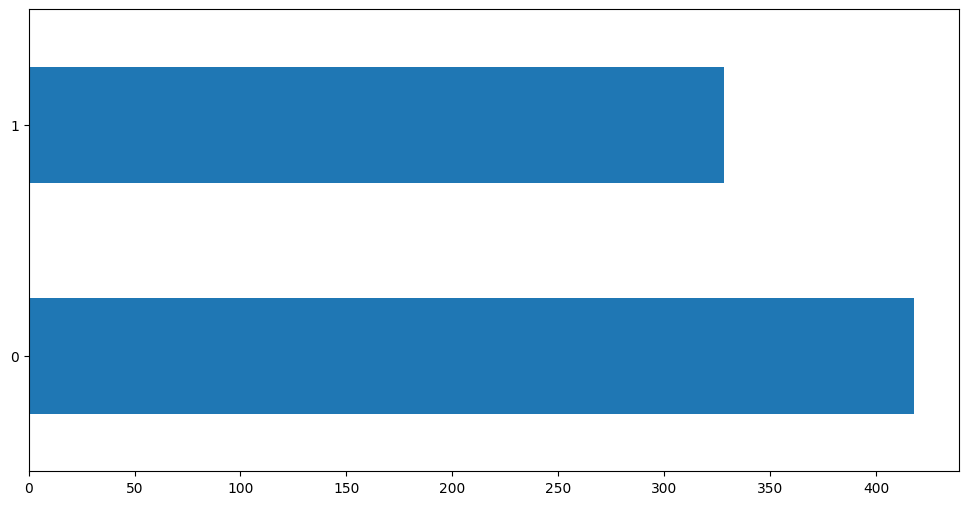

In [35]:
joined_mean_dfs.Label.value_counts().plot(kind='barh')

Looking for the amount of data from each class we can see that class 0 have more data when compared with class 1, for that reason when split data for train and test we need to stratify each to doesn't have imbalanced samples. 

But before split the data let's use PCA and understand the features and their impact to predict some class

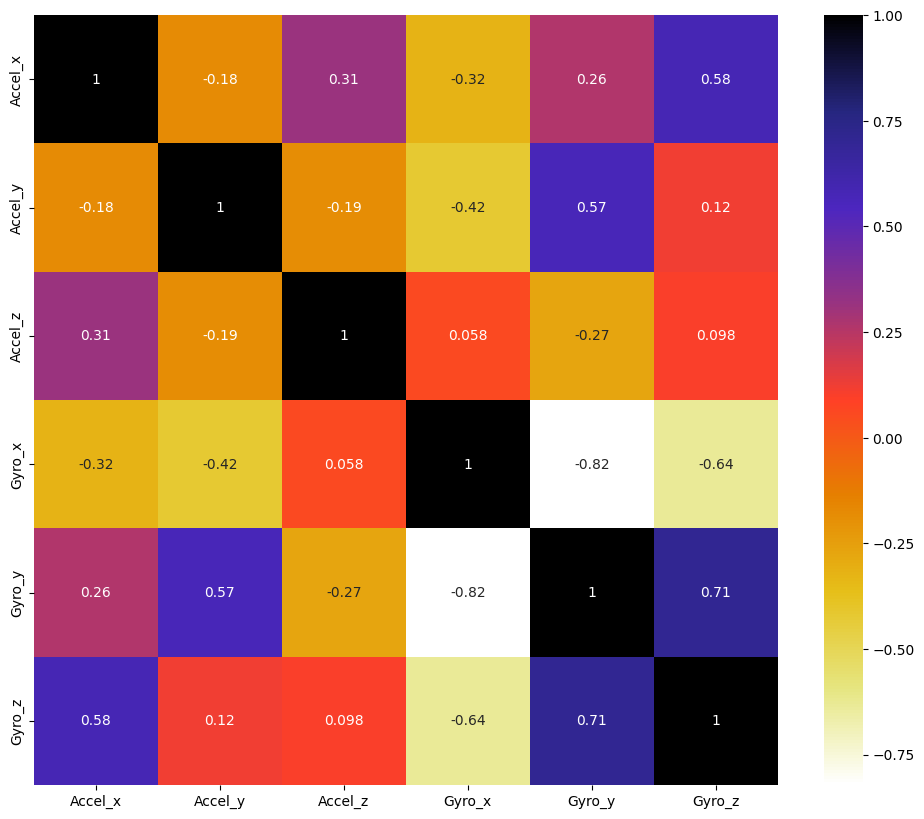

In [36]:
# first we need to remove Label column from the dataframe
x_data = joined_mean_dfs.loc[:, joined_mean_dfs.columns != 'Label']
y_data = joined_mean_dfs.Label

# plot matrix showing correlation between features using pearson correlation method
features_correlation = x_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(features_correlation, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  


When looking to the feature correlation matrix we can see that are some correlated, this means that when one of them changes the other will also change. The most correlated features are Gyro_y and Gyro_z however we can't remove one of them before see the importance of them to split data when using PCA. For this reason let's observe the PCA features variation, to understand which should be removed.

In [37]:
feature_variation = PCA().fit(x_data)

# show variance ratio for each component to understand which component as impact
print(feature_variation.explained_variance_ratio_)

pd.DataFrame(abs(feature_variation.components_),columns=x_data.columns,index = ['PC-1','PC-2','PC-3',
                                                                           'PC-4','PC-5','PC-6'])

[0.83968306 0.08283763 0.05526831 0.01129387 0.00676523 0.0041519 ]


,Accel_x,Accel_y,Accel_z,Gyro_x,Gyro_y,Gyro_z
PC-1,0.038089,0.082152,0.019376,0.445248,0.819067,0.349726
PC-2,0.208216,0.272110,0.149277,0.065399,0.314793,0.870027
PC-3,0.045205,0.079141,0.124643,0.886416,0.413347,0.139883
PC-4,0.057606,0.882573,0.412326,0.014871,0.139514,0.167478
PC-5,0.771014,0.125795,0.534302,0.095424,0.155104,0.266591
PC-6,0.596129,0.343780,0.711557,0.049159,0.125127,0.045363


Plot the data grouped by each component to provide better visualization

In [38]:
pca = PCA()
components = pca.fit_transform(x_data)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(6),
    color=y_data
)
fig.update_traces(diagonal_visible=False)
fig.show()

Let's plot the variance ratio in plot to provide better understanding

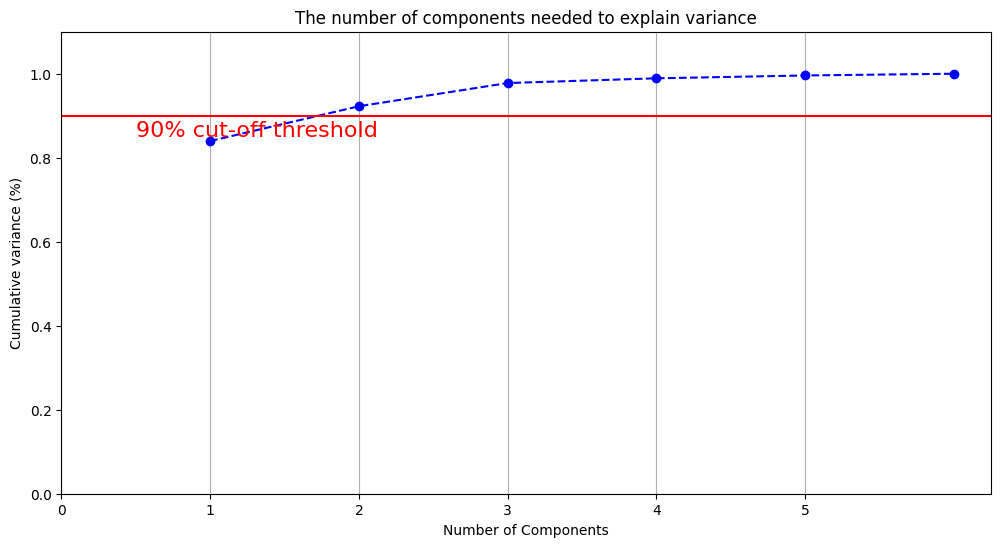

In [39]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,7, step=1)
y = np.cumsum(feature_variation.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Looking to the plot the first component almost achieve the 90% threshold of impact to split data. Using the 1st and 2nd we can overtake this threshold. For this reason first we will experiment only 1st component and if doesn't work we will add also the 2nd.

But first let's analyze the importance of each feature to understand what should be removed based on feature correlation matrix

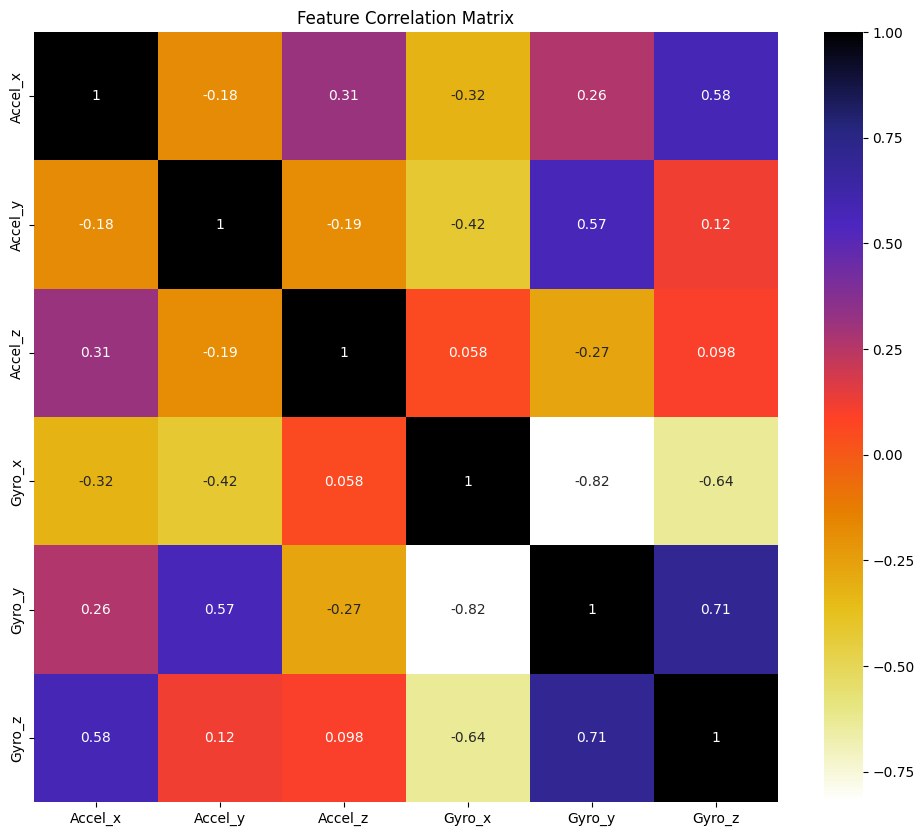

Feature Variation Components


,Accel_x,Accel_y,Accel_z,Gyro_x,Gyro_y,Gyro_z
PC-1,0.038089,0.082152,0.019376,0.445248,0.819067,0.349726
PC-2,0.208216,0.272110,0.149277,0.065399,0.314793,0.870027
PC-3,0.045205,0.079141,0.124643,0.886416,0.413347,0.139883


In [40]:
# plot feature correlation matrix again 
plt.figure(figsize=(12,10))
plt.title('Feature Correlation Matrix')
sns.heatmap(features_correlation, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

# plot feature importance but only 1st component
feature_variation = PCA(n_components=3).fit(x_data)
print('Feature Variation Components')
pd.DataFrame(abs(feature_variation.components_),columns=x_data.columns,index = ['PC-1','PC-2','PC-3'])

Observing the matrix and the dataframe with the variance Gyro_y and Gyro_Z are the most correlated features, but to drop one of them we need to look to the importance and we can see that Gyro_y almost is enough to explain 1st component. For this reason we will drop Gyro_z and test the model to see it's performance

In [41]:
# drop Gyro_Z column
x = x_data.drop(columns=['Accel_x', 'Accel_y', 'Accel_z'])
y = x.columns
x

,Gyro_x,Gyro_y,Gyro_z
0,-10.939908,13.419936,5.853275
1,8.340353,-17.760858,-6.301658
2,-2.337852,-2.788102,2.438668
3,6.972624,-11.954593,-3.208213
4,3.495112,-5.368287,-1.046471
...,...,...,...
741,-5.624165,3.914361,3.049380
742,-5.417683,2.180472,2.311496
743,-4.541269,-0.783397,1.077767
744,-2.601666,-2.881448,0.374855


In [48]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)
# fig = px.scatter(abs(components), x=0, color=y_data)
# fig.show()
# feature_variation = PCA().fit(x)
# print('Feature Variation Components')
# pd.DataFrame(abs(feature_variation.components_),columns=x.columns,index = ['PC-1','PC-2','PC-3'])

[0.83968306 0.08283763 0.05526831]


Observing the graph we can see that data is well splitted so let's test this in one model to check the accuracy, without normalize values.

In [49]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_data,test_size=0.30, random_state=42,stratify=y_data)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(522, 3) (522,) (224, 3) (224,)


In [63]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(400, 40), activation='relu', solver='adam', max_iter=500)
mlp_model = clf.fit(X_train, y_train)

In [64]:
mlp_model.score(X_test, y_test)

0.7678571428571429

In [65]:
mlp_model.score(X_train, y_train)

0.7816091954022989

Looking to these results since in the future we will not only use this feature, these are good results, but let's try to normalize data and check the result again.

In [58]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_pca)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y_data,test_size=0.30, random_state=42,stratify=y_data)

In [62]:
mlp_model = clf.fit(X_train, y_train)
mlp_model.score(X_test, y_test)

/home/andre/Desktop/Mestrado/FusaoDados/WorkDir/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.



0.7455357142857143

Looking to the accuracy obtained with data normalization, it's clear to see that we are loosing performance, for this reason the data will not be normalized

# Now let's test the model with the audio to understand if we can use the rms values and have good performance 

In [ ]:
audio_df = pd.read_csv('Collected_Data/audio_feat_values.csv')
# look the aspect of the dataframe
audio_df

In [ ]:
# drop the unnamed column
audio_df = audio_df.drop(columns='Unnamed: 0')
audio_df

In [ ]:
# check the variance of classes
audio_df.Label.value_counts().plot(kind='barh')
x = audio_df.loc[:, audio_df.columns != 'Label']
y = audio_df.Label
x

In [ ]:
# they are the same so let's split the data and train the model to understande accuracy
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30,stratify=y)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(400, 40), activation='relu', solver='adam', max_iter=800)
mpl = clf.fit(X_train,y_train)

In [ ]:
mlp_model.score(X_test, y_test)

In [ ]:
mlp_model.score(X_train, y_train)

Looking to the accuracy obtained with the audio sample we can conclude that the rms value are a good feature to differentiate the classes, Let's only check if we normalize we have better accuracy.

In [ ]:
# Let's normalize to check if provide better accuracy
scaled = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(scaled)
scaled_df

In [ ]:
mlp_model = clf.fit(scaled_df, y_train)
mlp_model.score(X_train, y_train)

 Looking the accuracy obtained with normalized values it's lower when compared without normalization, so we will give the data unnormalized.

# And for the first experiment it's all, Let's now try to acquiring the necessary data and the features calculated as mean for accelerometer ( Gyro x and y) and the audio with rms values.